In [2]:
#Import the dataset

import pandas as pd

df = pd.read_csv('Medicalpremium.csv')

--> The data is read from 'Medicalpremium.csv' and saved in to data frame 'df'.

In [3]:
print(df)

      Age  Diabetes  BloodPressureProblems  AnyTransplants  \
0      45         0                      0               0   
1      60         1                      0               0   
2      36         1                      1               0   
3      52         1                      1               0   
4      38         0                      0               0   
...   ...       ...                    ...             ...   
1007   50         0                      1               1   
1008   38         0                      1               0   
1009   22         0                      1               0   
1010   47         1                      0               0   
1011   23         1                      0               0   

      AnyChronicDiseases  Height  Weight  KnownAllergies  \
0                      0   155.0    57.0             0.0   
1                      0   180.0    73.0             0.0   
2                      0   158.0    59.0             0.0   
3              

--> The data in the dataset is printed and it has 1012 records with 11 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1012 non-null   int64  
 1   Diabetes                 1012 non-null   int64  
 2   BloodPressureProblems    1012 non-null   int64  
 3   AnyTransplants           1012 non-null   int64  
 4   AnyChronicDiseases       1012 non-null   int64  
 5   Height                   996 non-null    float64
 6   Weight                   999 non-null    float64
 7   KnownAllergies           1009 non-null   float64
 8   HistoryOfCancerInFamily  1012 non-null   int64  
 9   NumberOfMajorSurgeries   1012 non-null   int64  
 10  PremiumPrice             1007 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 87.1 KB


--> We have :
    PremiumPrice - (Target variable) in INR

   The remaining 10 predictors which have datatype of int and float. Some of the columns have few missing values

In [77]:
# Describing the dataset
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,41.673136,0.417773,0.474974,0.056180,0.185904,168.023493,76.821246,0.220633,0.121553,0.665986,24311.542390
std,13.912133,0.493444,0.499629,0.230386,0.389228,10.163613,14.088013,0.414886,0.326935,0.741535,6229.750803
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,12000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


--> The 5 number summary, mean and standard deviation of each column is displayed above.

In [78]:
# Finding if there are any duplicate records
df.duplicated().sum()

0

--> As seen from the result : There are no duplicate records in the dataset

In [5]:
#Finding the number of missing values in each column
df.isna().sum()

Age                         0
Diabetes                    0
BloodPressureProblems       0
AnyTransplants              0
AnyChronicDiseases          0
Height                     16
Weight                     13
KnownAllergies              3
HistoryOfCancerInFamily     0
NumberOfMajorSurgeries      0
PremiumPrice                5
dtype: int64

--> The Height has - 16, Weight - 13, KnownAllergies - 3 and PremiumPrice - 5 missing values.
    They need to be fixed before modelling

In [6]:
#Finding the percentage of missing values in each column
df.isna().mean()

Age                        0.000000
Diabetes                   0.000000
BloodPressureProblems      0.000000
AnyTransplants             0.000000
AnyChronicDiseases         0.000000
Height                     0.015810
Weight                     0.012846
KnownAllergies             0.002964
HistoryOfCancerInFamily    0.000000
NumberOfMajorSurgeries     0.000000
PremiumPrice               0.004941
dtype: float64

In [15]:
#Handling missing values
df.fillna({
                 'Height':df.Height.mean(),
                 'Weight':df.Weight.mean(),
            },
        inplace = True)

--> The missing values in the "Height" and "Weight" columns are filled with the mean values of the corresponding columns.

In [16]:
#Finding the percentage of missing values in each column
df.isna().mean()

Age                        0.000000
Diabetes                   0.000000
BloodPressureProblems      0.000000
AnyTransplants             0.000000
AnyChronicDiseases         0.000000
Height                     0.000000
Weight                     0.000000
KnownAllergies             0.002964
HistoryOfCancerInFamily    0.000000
NumberOfMajorSurgeries     0.000000
PremiumPrice               0.004941
dtype: float64

--> It is seen that the "KnownAllergies" and "PremiumPrice" has missing values less than 1%. Hence we shall drop the rows with     those missing values.

In [9]:
# Dropping null rows with null values
df.dropna(inplace=True)

In [79]:
df.isna().mean()

Age                        0.0
Diabetes                   0.0
BloodPressureProblems      0.0
AnyTransplants             0.0
AnyChronicDiseases         0.0
Height                     0.0
Weight                     0.0
KnownAllergies             0.0
HistoryOfCancerInFamily    0.0
NumberOfMajorSurgeries     0.0
PremiumPrice               0.0
dtype: float64

--> We could see that there are no more missing values in our data.

                                      EXPLORATORY DATA ANALYSIS

<AxesSubplot:ylabel='Age'>

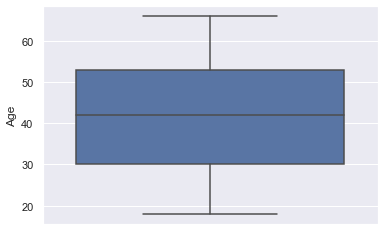

In [32]:
# Distribution of Age
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.boxplot( y=df["Age"] )

--> The distribution of numeric variable "Age" is as shown above. The box pot reveals that there are no outliers.
The mean age is 42.

<AxesSubplot:ylabel='Height'>

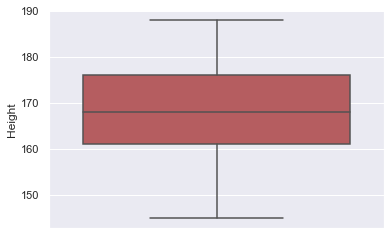

In [21]:
# Distribution of Height
sns.boxplot( y=df["Height"],color='r' )

--> The distribution of numeric variable "Height" is as shown above. The box pot reveals that there are no outliers.
The mean Height is 168.

<AxesSubplot:ylabel='Weight'>

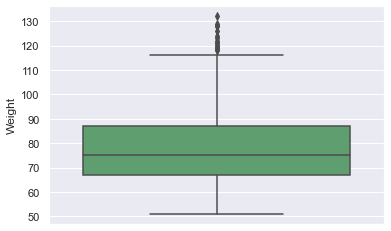

In [22]:
# Distribution of Weight
sns.boxplot( y=df["Weight"],color='g' )

--> The distribution of numeric variable "Weight" is as shown above. The box pot reveals that there are some outliers. But         those values can practically occur and hence we are not removing it from out data.
    The mean Weight is 77.

<AxesSubplot:xlabel='Age', ylabel='PremiumPrice'>

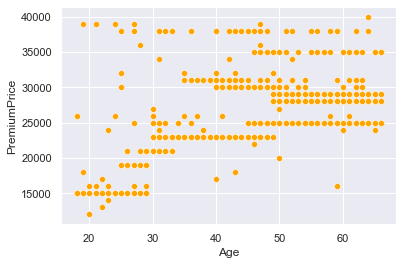

In [23]:
# Scatter plot of Age vs PremiumPrice
sns.scatterplot(data=df, x="Age", y="PremiumPrice",color='orange')

--> It is seen from the plot that there is good positive linear correlation between Age and PremiumPrice.

<AxesSubplot:xlabel='Diabetes', ylabel='PremiumPrice'>

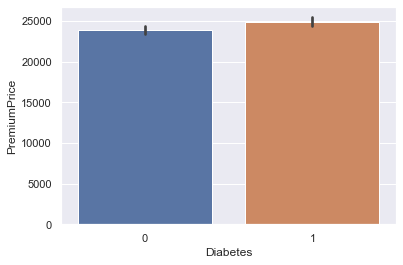

In [24]:
# Bar plot of Diabetes vs PremiumPrice
sns.barplot(x="Diabetes", y="PremiumPrice", data=df)

--> It is seen that the mean PremiumPrice of the people with Diabetes is slightly over those without Diabetes.

<AxesSubplot:xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

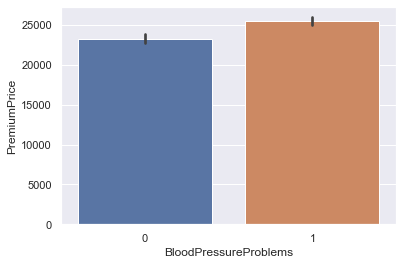

In [25]:
# Bar plot of BloodPressureProblems vs PremiumPrice
sns.barplot(x="BloodPressureProblems", y="PremiumPrice", data=df)

--> It is seen that the mean PremiumPrice of the people with BloodPressureProblems is greater than those without           BloodPressureProblems.

<AxesSubplot:xlabel='AnyTransplants', ylabel='PremiumPrice'>

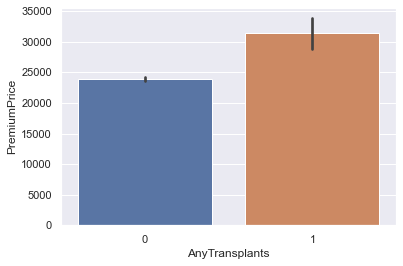

In [26]:
# Bar plot of AnyTransplants vs PremiumPrice
sns.barplot(x="AnyTransplants", y="PremiumPrice", data=df)

--> It is seen that the mean PremiumPrice of the people with AnyTransplants is well over those without AnyTransplants.

<AxesSubplot:xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

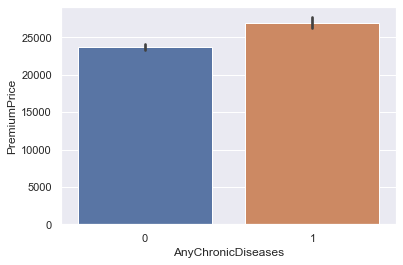

In [27]:
# Bar plot of AnyChronicDiseases vs PremiumPrice
sns.barplot(x="AnyChronicDiseases", y="PremiumPrice", data=df)


--> It is seen that the mean PremiumPrice of the people with AnyChronicDiseases is greater those without AnyChronicDiseases.


<AxesSubplot:xlabel='Height', ylabel='PremiumPrice'>

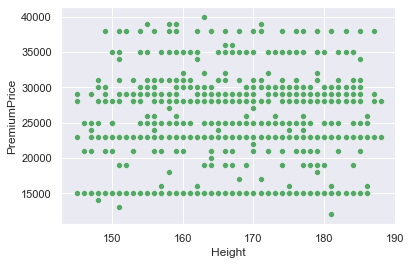

In [28]:
# Scatter plot of Height vs PremiumPrice
sns.scatterplot(data=df, x="Height", y="PremiumPrice",color='g')


--> We could see there is no much linear relation between Height and PremiumPrice


<AxesSubplot:xlabel='Weight', ylabel='PremiumPrice'>

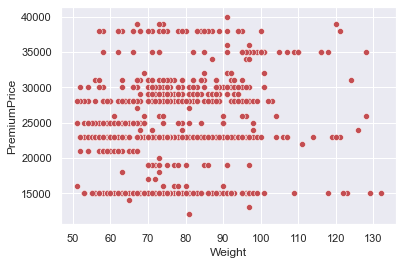

In [29]:
# Scatter plot of Weight vs PremiumPrice
sns.scatterplot(data=df, x="Weight", y="PremiumPrice",color='r')


--> We could see there is no much linear relation between Weight and PremiumPrice


<AxesSubplot:xlabel='KnownAllergies', ylabel='PremiumPrice'>

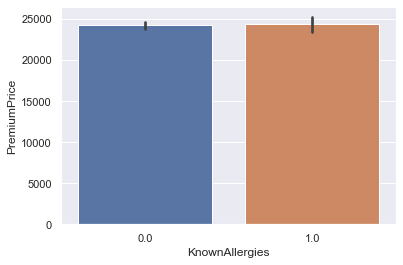

In [33]:
# Bar plot of KnownAllergies vs PremiumPrice
sns.barplot(x="KnownAllergies", y="PremiumPrice", data=df)


--> The mean PremiumPrice of the people with KnownAllergies is almost the same as those without KnownAllergies.


<AxesSubplot:xlabel='HistoryOfCancerInFamily', ylabel='PremiumPrice'>

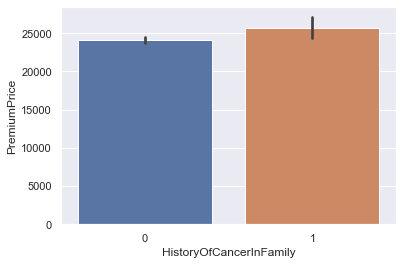

In [34]:
# Bar plot of HistoryOfCancerInFamily vs PremiumPrice
sns.barplot(x="HistoryOfCancerInFamily", y="PremiumPrice", data=df)


--> The mean PremiumPrice of the people with HistoryOfCancerInFamily is greater than those without HistoryOfCancerInFamily.


<AxesSubplot:xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

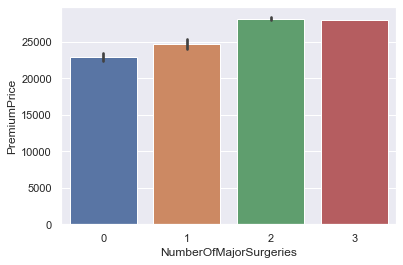

In [35]:
# Bar plot of NumberOfMajorSurgeries vs PremiumPrice
sns.barplot(x="NumberOfMajorSurgeries", y="PremiumPrice", data=df)


--> From the graph its clear that as the NumberOfMajorSurgeries increased, the mean PremiumPrice went up and is the maximum for 
those with 2 and 3 NumberOfMajorSurgeries.


<AxesSubplot:>

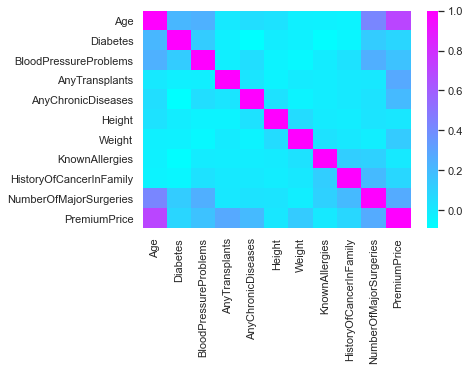

In [40]:
# Correlation between variables
#sns.heatmap(df.loc[:,['Age','Height','Weight','PremiumPrice']].corr(),annot=True,cmap="cool")
sns.heatmap(df.loc[:,:].corr(),cmap="cool")


--> From the correlation matrix, we could see that the Age and PremiumPrice have high correlation and the rest of the columns with minor corrlation. 


In [41]:
# Shuffling the data
df = df.sample(frac = 1, random_state=0)

In [42]:
# Separating the predictors and the target variables
X = df.drop(columns=['PremiumPrice'])
y = pd.Series(df.PremiumPrice, name = 'premiumprice')


--> The predictors are saved to X data frame.
    The target variable 'premiumprice' is saved as a series y.


In [43]:
# To confirm the dataframe have only independent variables
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 291 to 708
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      979 non-null    int64  
 1   Diabetes                 979 non-null    int64  
 2   BloodPressureProblems    979 non-null    int64  
 3   AnyTransplants           979 non-null    int64  
 4   AnyChronicDiseases       979 non-null    int64  
 5   Height                   979 non-null    float64
 6   Weight                   979 non-null    float64
 7   KnownAllergies           979 non-null    float64
 8   HistoryOfCancerInFamily  979 non-null    int64  
 9   NumberOfMajorSurgeries   979 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 84.1 KB


In [44]:
# Running the OLS for feature selection
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           premiumprice   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     169.5
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          7.06e-205
Time:                        02:05:40   Log-Likelihood:                -9446.8
No. Observations:                 979   AIC:                         1.892e+04
Df Residuals:                     968   BIC:                         1.897e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6


--> The OLS model summary will give the p-values for each independent variables and for those variables with p-values greater than the half the significance level, needs to be elliminated before doing the linear regression.
In our case, "Diabetes", "BloodPressureProblems", "Height" and "KnownAllergies" needs to be removed from our dataset.


In [46]:
#Backward Feature Elimination
maxp = lr.pvalues.max()
while(maxp > 0.025):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           premiumprice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     281.4
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.50e-208
Time:                        02:14:06   Log-Likelihood:                -9449.4
No. Observations:                 979   AIC:                         1.891e+04
Df Residuals:                     972   BIC:                         1.895e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4


--> After running the backward feature ellimination, we could see that only significant variables are sustained in our dataset and this data is to be considered for linear regression.


In [47]:
# Removing constant
X= X2.drop('const',axis=1)

In [80]:
# Making sure all unwanted variables are removed
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 291 to 708
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      979 non-null    int64  
 1   AnyTransplants           979 non-null    int64  
 2   AnyChronicDiseases       979 non-null    int64  
 3   Weight                   979 non-null    float64
 4   HistoryOfCancerInFamily  979 non-null    int64  
 5   NumberOfMajorSurgeries   979 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 53.5 KB


In [49]:
#Let's use sklearn to do Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()


--> The sklearn package is used to import linear regression library and an instance of linear regression model is created.
The fit method is used with X and y as inputs.


In [50]:
#check R^2 value
R2=model.score(X,y)
R2

0.6346197406229959


--> The R^2 values is obtained from the model.score method and its 0.6346. The R^2 refers to the % change in y which can be explained by the change in X.


In [53]:
#Function to Calculate Adj R^2 value
def adjR2(n,k,R2):
    return 1 - ((n-1)/(n-k-1))*(1-R2)

In [54]:
n = X.shape[0]
k = X.shape[1]
adjR2(n,k,R2)

0.6323643069231378


--> The adjusted R^2 values is 0.6323


In [55]:
#k-fold cross validation using linear regression model
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=4).mean()

0.6235262863940386


--> The k-fold cross validation is done for data set by dividing it in to 4 chunks and taking the mean R^2 values of all those.
This is a more robust method of taking R^2 value of the model. The k-fold R^2 is 0.6235.


                                          TESTING THE MODEL

In [58]:
#split the data in training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=89,test_size=0.25)


--> The data set is split into training set (75%) and testing set (25%) and is used further for testing the model.


In [59]:
# Creating instance of Linear Regression Model
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression()


--> The model is created with the training data set using the fit method.


In [60]:
#Training score 
R2 = lrmodel.score(X_train,y_train)
print('Training R2 =',R2) #r2 value
print('Training Adj-R2 =',adjR2(X_train.shape[0],X_train.shape[1],R2))

Training R2 = 0.6622717450624971
Training Adj-R2 = 0.6594844417205095



--> The Training R^2 value = 0.6622 and Adj-R^2 value = is 0.6594 are obtained.


In [61]:
#Test score 
R2 = lrmodel.score(X_test,y_test)
print('Test R2 =',R2) #r2 value
print('Test Adj-R2 =',adjR2(X_test.shape[0],X_test.shape[1],R2))

Test R2 = 0.5413567139404493
Test Adj-R2 = 0.5297942781574354


The Test R2 = 0.5413 and Test Adj-R2 = 0.5297 is obtained and will be lower as the test data is new to the model.

In [62]:
#predict y values
y_pred = lrmodel.predict(X_test)
y_pred[0:10]

array([20107.93316673, 24446.77505649, 27379.87185939, 23042.03148748,
       20672.91827515, 25468.40812016, 20615.59038198, 27656.7443109 ,
       35131.94256929, 31155.67281073])


--> The predict method is used to predict the y for the testing set of X and few values are as shown above.


In [76]:
#check the root mean squared error between the predicted and true values on the test set
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Squared Error : ",mean_squared_error(y_test,y_pred)) # mse = mean[(y_pred - y_test)^2]
print("Root Mean Squared Error : ",mean_squared_error(y_test,y_pred,squared=False)) # RMSE = sqrt(mean[(y_pred - y_test)^2])


Mean Squared Error :  17439936.740354285
Root Mean Squared Error :  4176.115029588419


In [66]:
# Running the linear regression model
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [67]:
model.intercept_.round(3)

4620.083


--> The intercept is the b0 value.


In [69]:
model.coef_.round(3)

array([ 326.987, 7417.069, 2657.881,   68.595, 2244.579, -583.113])


--> The coifficients are the b1, b2... values corresponding to the predictors.


Inferences:

PremiumPrice = 4620.083 + (326.987 * Age) + (7417.069 * AnyTransplants) + (2657.881 * AnyChronicDiseases) + (68.595 * Weight) +
                         (2244.579 * HistoryOfCancerInFamily) - (583.113 * NumberOfMajorSurgeries)

The model is weak because the k-fold R^2 value is low (0.6235). May be a different model (non-linear) will be better to predict the output variable as the correlation study suggests.